# 와인 품질 분류

wine_quality.csv 파일이 존재합니다.

와인의 여러가지 화학 성분을 기반으로 와인의 품질을 분류해내는 것이 목표입니다.

- index 구분자
- quality 품질
- fixed acidity 산도
- volatile acidity 휘발성산
- citric acid 시트르산
- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
- chlorides 염화물
- free sulfur dioxide 독립 이산화황
- total sulfur dioxide 총 이산화황
- density 밀도
- pH 수소이온농도
- sulphates 황산염
- alcohol 도수
- type 종류

데이터셋 출처: https://dacon.io/competitions/open/235610/data

(학습을 위해 원래 데이터셋에서 test.csv는 제외하고, train.csv 파일만을 고려하여 진행했습니다.)

In [1]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [84]:
#데이터셋 불러오기
wine_data=pd.read_csv("wine_quality.csv")

## 데이터 전처리, EDA 및 시각화

### wine_data 데이터를 살펴보고, 쓸모 없는 column을 삭제하시오.(index column 삭제)

In [85]:
wine_data.head(3)
wine_data.drop(['index'],axis="columns", inplace=True)
wine_data.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [86]:
#wine_data.columns 결과 확인
wine_data.columns

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

### info()를 결측치가 있는지 확인하고, describe()를 통해 수치형 피쳐들의 scale을 살펴보고, 스케일링을 진행해야 하는지 살펴보시오. 

In [87]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [88]:
wine_data.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


표준편차가 큰 free sulfur dioxide,total sulfur dioxide 변수 스케일링 필요할 듯

### wine_data에서 각 피쳐들 간의 상관관계를 나타내는 히트맵을 출력하시오.

<AxesSubplot:>

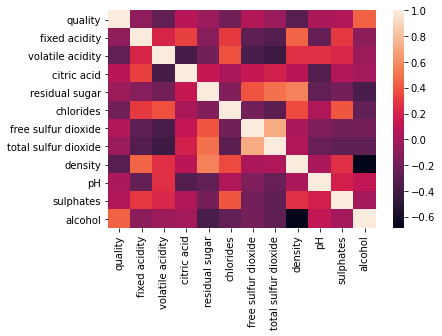

In [89]:
sns.heatmap(wine_data.corr())

### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_wine, y_wine으로 저장하시오. (target은 quality)

In [90]:
#데이터 확인(X_wine)
X_wine=wine_data.drop('quality', axis=1)
X_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [91]:
#데이터 확인(y_wine)
y_wine=wine_data.quality
y_wine

0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64

### 피쳐값 중 카테고리 변수가 1가지 있다. 이에 대해 Encoding을 진행하시오.

In [92]:
X_wine.type.unique()

array(['white', 'red'], dtype=object)

In [93]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X_wine['type'] = label.fit_transform(X_wine['type'])

In [94]:
#Encoding이 잘 되었는지 확인
X_wine['type'].unique()

array([1, 0])

### 피쳐값에 대해 MinMaxScaler()를 이용해 스케일링을 하시오.
- 스케일링 된 피쳐값은 데이터프레임 형식으로 X_wine_scaled에 저장

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#scaler.fit_transform(X_wine)
X_wine_scaled=pd.DataFrame(data=scaler.fit_transform(X_wine), columns=X_wine.columns)

In [96]:
#Scaling 잘 되었는지 확인
X_wine_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,1.0
1,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,0.0
2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,1.0
3,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,1.0
4,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.322314,0.046667,0.174699,0.010736,0.033278,0.031250,0.133641,0.117409,0.480315,0.095506,0.304348,1.0
5493,0.206612,0.066667,0.216867,0.009202,0.041597,0.086806,0.241935,0.069983,0.330709,0.162921,0.434783,1.0
5494,0.330579,0.046667,0.204819,0.007669,0.043261,0.104167,0.200461,0.074224,0.259843,0.280899,0.478261,1.0
5495,0.231405,0.220000,0.186747,0.015337,0.054908,0.059028,0.218894,0.093310,0.307087,0.106742,0.362319,1.0


### train_test_split()을 이용해 train set와 test set를 분리하시오.
- testset 의 size : 전체 데이터 셋의 20%
- 각 set의 이름 : X_train, X_test, y_train, y_test
- random_state = 123

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_wine_scaled,y_wine, test_size=0.2, random_state=123)

In [98]:
#잘 분리되었는지 확인
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(4397, 12)

(1100, 12)

(4397,)

(1100,)

### GradientBoostingClassifier을 사용해 train data를 fit 한 후, test data로 예측을 수행하고 정확도를 구하시오

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GradientBoostingClassifier()

GBM 정확도: 0.5427
GBM 수행 시간: 4.7 초 


### GridSearchCV를 사용해 최적 하이퍼 파라미터 조합을 찾으시오
params={
    'learning_rate':[0.05,0.1],
    'n_estimators':[100,500]
}

In [18]:
from sklearn.model_selection import GridSearchCV
params={ 'learning_rate':[0.05,0.1], 'n_estimators':[100,500] }

grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [100, 500]},
             verbose=1)

최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.5818


최적으로 학습된 estimator로 예측을 수행하시오

In [19]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.6182


## XGBoost 및 LightGBM 실습

### 사이킷런 래퍼 클래스 XGBoost를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도 및 F1 스코어를 출력하시오.
- n_estimators=400
- learning_rate = 0.1
- max_depth = 3

In [21]:
#accuracy_score(), f1_score 임포트
#f1_score는 기본적으로 이진분류에 사용되므로, 다중분류에서 사용하고 싶으면 average='무엇무엇' 설정해주면 됨
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 공식 문서 참고
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred)
    f1 = f1_score(y_test,pred,average='micro')
    print('정확도:',accuracy,'F1:',f1)

In [26]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3,eval_metric='mlogloss')
xgb_wrapper.fit(X_train, y_train)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , w_preds, w_pred_proba)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

정확도: 0.5854545454545454 F1: 0.5854545454545454


### 사이킷런 래퍼 클래스 LightGBM와 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합과 그 하이퍼 파라미터의 예측 정확도를 구하시오.
- 'n_estimators' : [100,200,300,400,500]
- 'learning_rate' : [0.01,0.05, 0.1, 0.15, 0.2]
- 'max_depth' : [3,4,5,6,7]

(제 컴퓨터에선 2분정도 걸려욤)

In [27]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params={'max_depth' : [3,4,5,6,7],'learning_rate' : [0.01,0.05, 0.1, 0.15, 0.2],'n_estimators' : [100,200,300,400,500] }

lgbm_clf = LGBMClassifier()
grid_cv = GridSearchCV(lgbm_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 125 candidates, totalling 250 fits


GridSearchCV(cv=2, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

최적 하이퍼 파라미터:
 {'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100}
최고 예측 정확도: 0.6018


### plot_importance()를 통해 피쳐 중요도를 시각화하고, 어떤 피쳐가 가장 중요한지 기술하시오.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

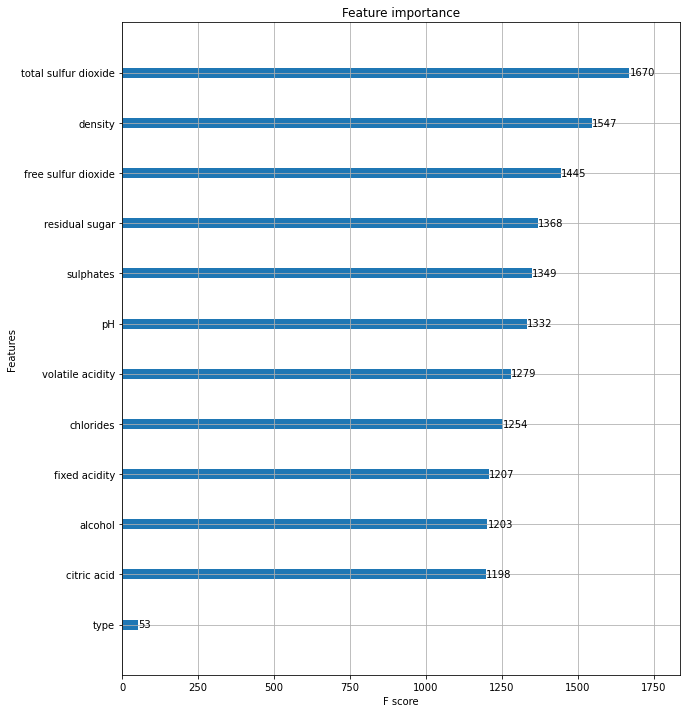

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)

## 스태킹 실습

### CV 세트 기반의 스태킹을 진행하려 한다. 개별 기반 모델들이 교차 검증을 통해 최종 메타 모델이 사용할 학습용, 테스트용 데이터를 생성하기 위한 함수를 작성하시오.
```
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    return train_fold_pred , test_pred_mean
```

In [118]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings(action='ignore')

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=True,random_state=0)
    
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n.iloc[train_index]
        y_tr = y_train_n.iloc[train_index]
        X_te = X_train_n.iloc[train_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

### 스태킹에 사용될 머신러닝 알고리즘 클래스를 생성하시오.
- 개별 모델: KNN(n_neighbors=4), 랜덤 포레스트(n_estimators=100, random_state=0), 결정 트리, 에이다부스트(n_estimators=100), LightGBM(n_estimators=400)
- 최종 모델: 로지스틱 회귀(C=10)

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)
lgbm_clf= LGBMClassifier(n_estimators=400)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

### 개별 모델별로 get_stacking_base_datasets 함수를 수행하여 최종 메타 모델이 사용할 학습용, 테스트용 데이터를 생성하시오.
- 폴드 개수는 7개

In [120]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 


ValueError: shape mismatch: value array of shape (3768,1) could not be broadcast to indexing result of shape (629,1)

### 생성된 학습용 데이터와 테스트용 데이터를 각각 합치시오.
- 학습용 데이터는 Stack_final_X_train
- 테스트용 데이터는 Stack_final_X_test

In [117]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train,lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test,lgbm_train, axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

SyntaxError: invalid syntax (<ipython-input-117-b78c650db9fa>, line 2)

### 최종 메타 모델인 로지스틱 회귀를 사용하여 학습 및 예측을 진행하고 최종 메타 모델의 예측 정확도를 출력하시오.

In [ ]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

# 버섯 독성 여부 분류 - CatBoost 실습

mushrooms.csv 파일을 사용합니다.

독성 버섯인지 식용 가능한 버섯인지 분류해내는 것이 목표입니다.

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

데이터셋 출처: https://www.kaggle.com/datasets/uciml/mushroom-classification

In [48]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np

In [57]:
#데이터셋 불러오기
mush=pd.read_csv("mushrooms.csv")
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 데이터 전처리

### info()를 통해 결측치가 있는지 확인하시오.

In [23]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_mushroom, y_mushroom으로 저장하시오
- target은 class

In [58]:
X_mushroom=mush.drop('class', axis=1)
y_mushroom=mush['class']

In [59]:
#데이터 확인(X_mushroom)
X_mushroom
X_mushroom.columns

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [26]:
#데이터 확인(y_mushroom)
y_mushroom

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

### train_test_split()을 이용해 train set과 test set을 분리하시오.

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_mushroom,y_mushroom, test_size=0.2, random_state=123)

In [62]:
#잘 분리되었는지 확인
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(6499, 22)

(1625, 22)

(6499,)

(1625,)

### CatBoost를 진행할 수 있도록 범주형 변수를 처리하시오.
- trainset은 train_pool에 저장
- testset은 test_pool에 저장

In [63]:
from catboost import Pool

train_pool=Pool(data=X_train, label=y_train, cat_features=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

test_pool=Pool(data=X_test, label=y_test, cat_features=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

### CatBoost 모델을 기반으로 버섯에 대한 정보를 학습하고 버섯의 독성 여부를 예측하시오.
- iteration=400, learning_rate=0.1, max_depth=3
- catb_predes, catb_pred_proba

In [74]:
from catboost import CatBoostClassifier

cat=CatBoostClassifier( learning_rate=0.1, max_depth=3,iterations=400)
cat.fit(train_pool)
catb_predes=cat.predict(test_pool)
catb_pred_proba=cat.predict_proba(test_pool)[:,1]

0:	learn: 0.4779436	total: 9.03ms	remaining: 3.6s
1:	learn: 0.3395324	total: 20.9ms	remaining: 4.15s
2:	learn: 0.2347481	total: 33.3ms	remaining: 4.4s
3:	learn: 0.1785895	total: 45.2ms	remaining: 4.47s
4:	learn: 0.1317549	total: 57ms	remaining: 4.5s
5:	learn: 0.0871102	total: 70.1ms	remaining: 4.6s
6:	learn: 0.0678277	total: 82.1ms	remaining: 4.61s
7:	learn: 0.0552047	total: 93.7ms	remaining: 4.59s
8:	learn: 0.0458919	total: 106ms	remaining: 4.62s
9:	learn: 0.0391817	total: 117ms	remaining: 4.57s
10:	learn: 0.0357411	total: 127ms	remaining: 4.49s
11:	learn: 0.0310481	total: 138ms	remaining: 4.45s
12:	learn: 0.0272550	total: 165ms	remaining: 4.91s
13:	learn: 0.0245675	total: 183ms	remaining: 5.05s
14:	learn: 0.0220894	total: 199ms	remaining: 5.11s
15:	learn: 0.0204985	total: 210ms	remaining: 5.05s
16:	learn: 0.0190451	total: 230ms	remaining: 5.18s
17:	learn: 0.0177786	total: 240ms	remaining: 5.1s
18:	learn: 0.0164332	total: 252ms	remaining: 5.05s
19:	learn: 0.0155367	total: 264ms	remain

177:	learn: 0.0025501	total: 2.52s	remaining: 3.14s
178:	learn: 0.0025501	total: 2.54s	remaining: 3.14s
179:	learn: 0.0025500	total: 2.58s	remaining: 3.15s
180:	learn: 0.0025500	total: 2.6s	remaining: 3.15s
181:	learn: 0.0024939	total: 2.63s	remaining: 3.15s
182:	learn: 0.0024939	total: 2.64s	remaining: 3.13s
183:	learn: 0.0024939	total: 2.65s	remaining: 3.11s
184:	learn: 0.0024939	total: 2.66s	remaining: 3.09s
185:	learn: 0.0024939	total: 2.67s	remaining: 3.07s
186:	learn: 0.0024939	total: 2.68s	remaining: 3.05s
187:	learn: 0.0024938	total: 2.69s	remaining: 3.03s
188:	learn: 0.0024938	total: 2.7s	remaining: 3.01s
189:	learn: 0.0024938	total: 2.71s	remaining: 3s
190:	learn: 0.0024938	total: 2.74s	remaining: 3s
191:	learn: 0.0024938	total: 2.77s	remaining: 3s
192:	learn: 0.0024938	total: 2.78s	remaining: 2.98s
193:	learn: 0.0024938	total: 2.79s	remaining: 2.97s
194:	learn: 0.0024938	total: 2.81s	remaining: 2.95s
195:	learn: 0.0024938	total: 2.81s	remaining: 2.93s
196:	learn: 0.0024938	t

337:	learn: 0.0022426	total: 4.82s	remaining: 884ms
338:	learn: 0.0022070	total: 4.84s	remaining: 870ms
339:	learn: 0.0022070	total: 4.85s	remaining: 856ms
340:	learn: 0.0022070	total: 4.86s	remaining: 841ms
341:	learn: 0.0022070	total: 4.89s	remaining: 829ms
342:	learn: 0.0022060	total: 4.92s	remaining: 818ms
343:	learn: 0.0022059	total: 4.95s	remaining: 807ms
344:	learn: 0.0022059	total: 4.97s	remaining: 792ms
345:	learn: 0.0022042	total: 4.98s	remaining: 778ms
346:	learn: 0.0022042	total: 5s	remaining: 763ms
347:	learn: 0.0022042	total: 5.01s	remaining: 748ms
348:	learn: 0.0022026	total: 5.02s	remaining: 733ms
349:	learn: 0.0022026	total: 5.04s	remaining: 720ms
350:	learn: 0.0021569	total: 5.05s	remaining: 706ms
351:	learn: 0.0021569	total: 5.06s	remaining: 691ms
352:	learn: 0.0021569	total: 5.09s	remaining: 678ms
353:	learn: 0.0021555	total: 5.12s	remaining: 666ms
354:	learn: 0.0021071	total: 5.14s	remaining: 652ms
355:	learn: 0.0021071	total: 5.15s	remaining: 637ms
356:	learn: 0.0

### 예측 성능을 평가하시오.

In [83]:
get_clf_eval(y_test,catb_predes,catb_pred_proba)

정확도: 1.0 F1: 1.0
